# Análise de média de ancestralidade em Goiás
Nesse projeto de análise de dados, criamos um projeto para analisar a ancestralidade média dos habitantes do estado de Goiás com base na média de ancestralidade da pessoa

O dataset foi gerado a partir de simulações de censos municipais e regionais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/kaggle/input/ancestralidade-goias/simulacao_ancestralidade_goias.csv")
df.head()

,Cidade,Idade,Sexo,Escolaridade,Renda (R$),Ancestralidade Europeia (%),Ancestralidade Africana (%),Ancestralidade Indígena (%),Ancestralidade Asiática (%),Ancestralidade Outra (%)
0,Luziânia,51,Feminino,Pós-graduação,2356.72,57.762666,18.659892,17.705474,0.406651,5.465316
1,Aparecida de Goiânia,23,Masculino,Médio,1899.40,56.477752,18.354271,18.824032,1.765366,4.578579
2,Rio Verde,39,Feminino,Fundamental,2191.82,58.539622,33.274892,15.773991,0.951557,0.000000
3,Aparecida de Goiânia,28,Masculino,Fundamental,1762.57,66.042253,21.478604,16.407350,0.295244,0.000000
4,Aparecida de Goiânia,65,Feminino,Pós-graduação,2962.72,64.990248,20.276547,13.138187,0.766593,0.828426


In [3]:
# Selecionar apenas as colunas de ancestralidade
ancestry_cols = [
    "Ancestralidade Europeia (%)",
    "Ancestralidade Africana (%)",
    "Ancestralidade Indígena (%)",
    "Ancestralidade Asiática (%)",
    "Ancestralidade Outra (%)"
]
features = df[ancestry_cols]
print(features)

     Ancestralidade Europeia (%)  Ancestralidade Africana (%)  \
0                      57.762666                    18.659892   
1                      56.477752                    18.354271   
2                      58.539622                    33.274892   
3                      66.042253                    21.478604   
4                      64.990248                    20.276547   
..                           ...                          ...   
195                    55.726134                    34.826638   
196                    56.179999                    34.814113   
197                    56.163382                    23.074699   
198                    52.599387                    26.642477   
199                    66.492344                    24.638583   

     Ancestralidade Indígena (%)  Ancestralidade Asiática (%)  \
0                      17.705474                     0.406651   
1                      18.824032                     1.765366   
2                      1

In [4]:
# Padronização de dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [5]:
# Aplicas K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(features_scaled)

In [6]:
# Resumo médio de ancestralidade por cluster
cluster_summary = df.groupby('Cluster')[ancestry_cols].mean().reset_index()

# Médias de ancestralidade por cluster
Aqui criamos o gráfico de média de ancestralidade por cluster

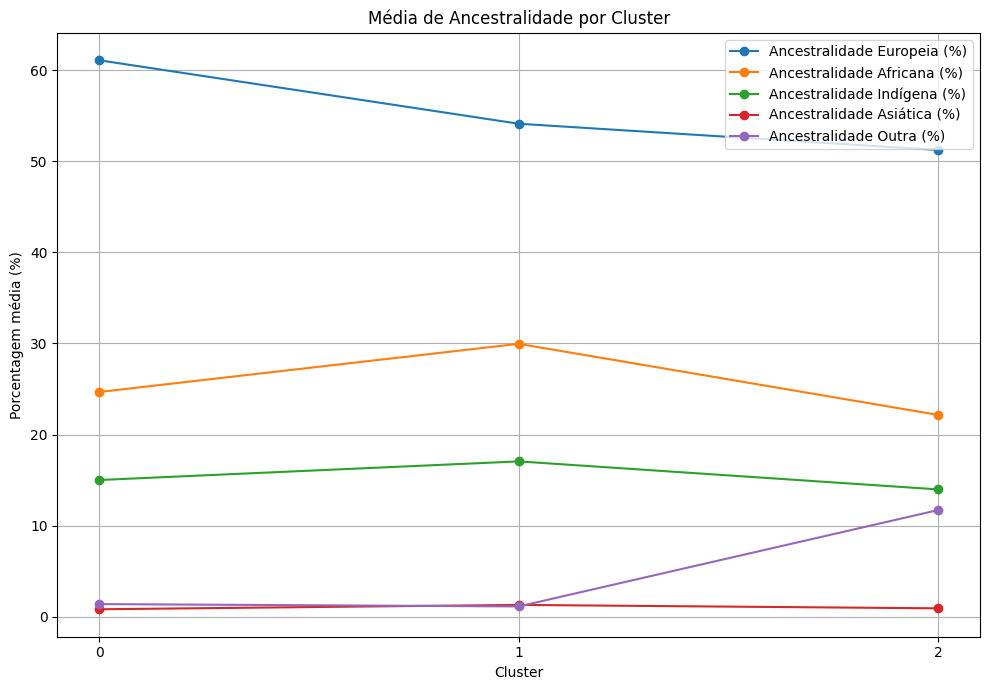

In [7]:
# Plotar gráfico de médias de ancestralidade por cluster
plt.figure(figsize=(10, 7))
for col in ancestry_cols:
    plt.plot(
        cluster_summary['Cluster'],
        cluster_summary[col],
        marker='o',
        label=col
    )
plt.title("Média de Ancestralidade por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Porcentagem média (%)")
plt.xticks(cluster_summary['Cluster'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de Dispersão

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

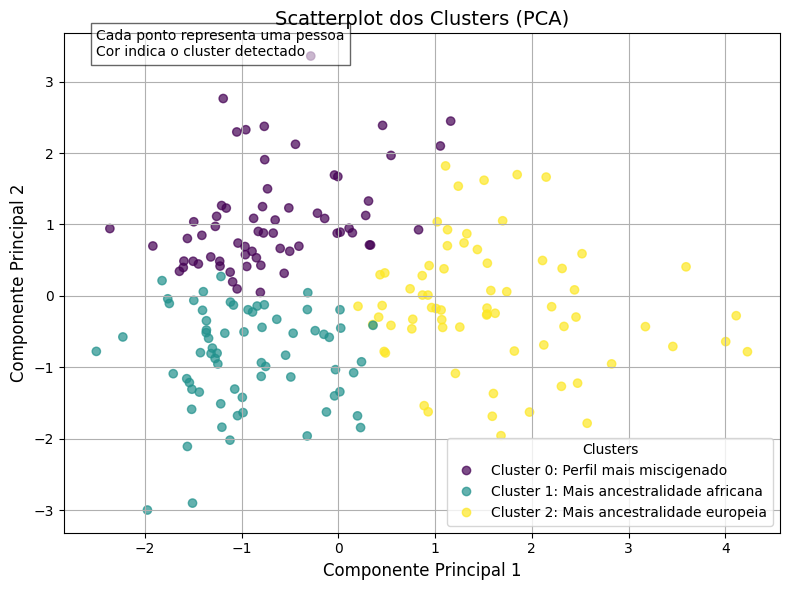

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.7
)

plt.title("Scatterplot dos Clusters (PCA)", fontsize=14)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

labels = {
    0: "Cluster 0: Perfil mais miscigenado",
    1: "Cluster 1: Mais ancestralidade africana",
    2: "Cluster 2: Mais ancestralidade europeia"
}
handles, _ = scatter.legend_elements()
plt.legend(handles, [labels[i] for i in range(len(handles))], title="Clusters")

# Explicação extra no gráfico
plt.text(min(pca_result[:,0]), max(pca_result[:,1]),
         "Cada ponto representa uma pessoa\nCor indica o cluster detectado",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.grid(True)
plt.tight_layout()
plt.show()